In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
pd.set_option('display.max_row', 1000) #affichier 100 lignes 
pd.set_option('display.max_column', 16) #affichier 15 colonnes 

In [4]:
data = pd.read_excel(r"C:\Users\amald\OneDrive\Documents\MEMOIRE_IFID\BD_finale.xlsx") #importer dataset

In [5]:
data.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


# Analyse de la forme des données

In [6]:
df = data.copy()

In [7]:
df.shape #nombres de colonnes et lignes 

(18897, 16)

In [8]:
df.dtypes #types de variables 

ID                                        int64
Rachat                                    int64
Prime                                   float64
Fréquence                                object
Date_Effet                       datetime64[ns]
Date_Echéance                    datetime64[ns]
Durée_Contrat                           float64
Réseau_Distribution                      object
Date_de_naissance                datetime64[ns]
Age_Souscription                        float64
Age_Survenance                          float64
Sexe                                     object
Status_Contrat                           object
Date_Survenance                          object
Ancienneté_Contrat_Survenance           float64
Durée_Restante_Echéance                 float64
dtype: object

In [9]:
df.dtypes.value_counts() #compter le nombre de types de variables 

float64           6
object            5
datetime64[ns]    3
int64             2
dtype: int64

In [10]:
df.isna()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

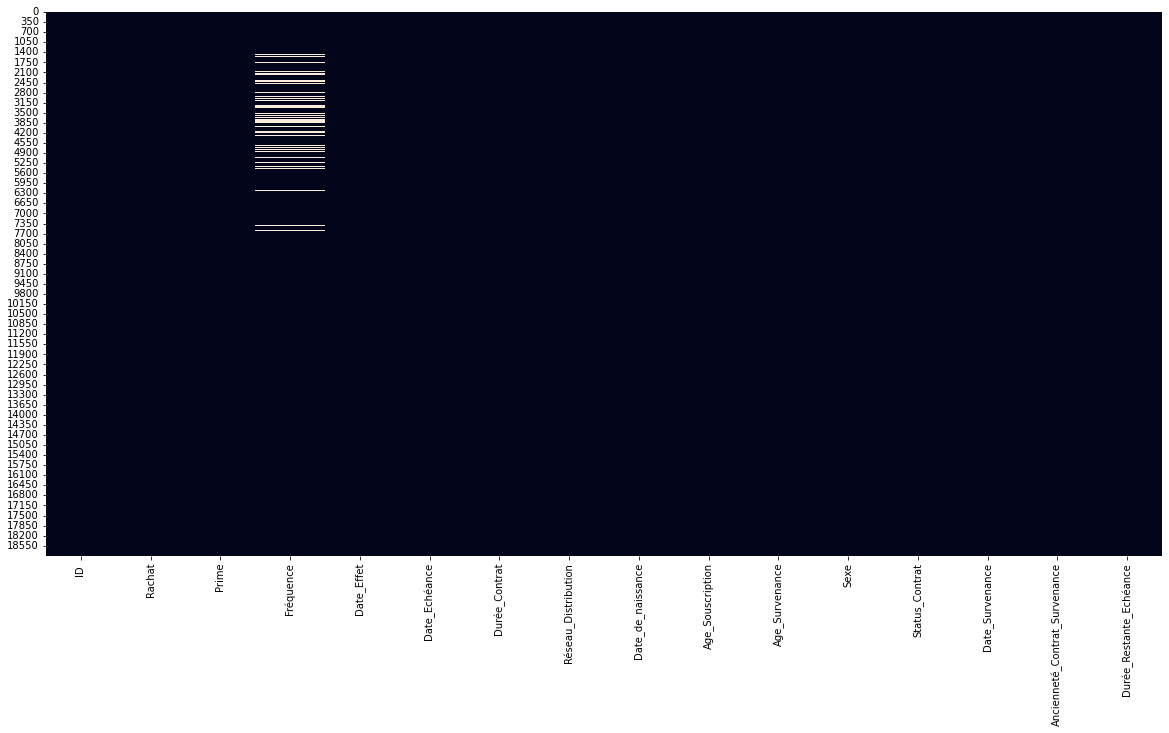

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) #pourcentages de valeurs manquantes par variable par ordre ascendent

ID                               0.000000
Rachat                           0.000000
Prime                            0.000000
Durée_Contrat                    0.000000
Réseau_Distribution              0.000000
Sexe                             0.000000
Status_Contrat                   0.000000
Date_Survenance                  0.000000
Ancienneté_Contrat_Survenance    0.000000
Durée_Restante_Echéance          0.000000
Date_de_naissance                0.000106
Age_Survenance                   0.000106
Date_Effet                       0.000529
Date_Echéance                    0.000529
Age_Souscription                 0.000635
Fréquence                        0.054718
dtype: float64

# Analyse du Fond

## 1. Visulation initiale - Elimination des colonnes inutiles

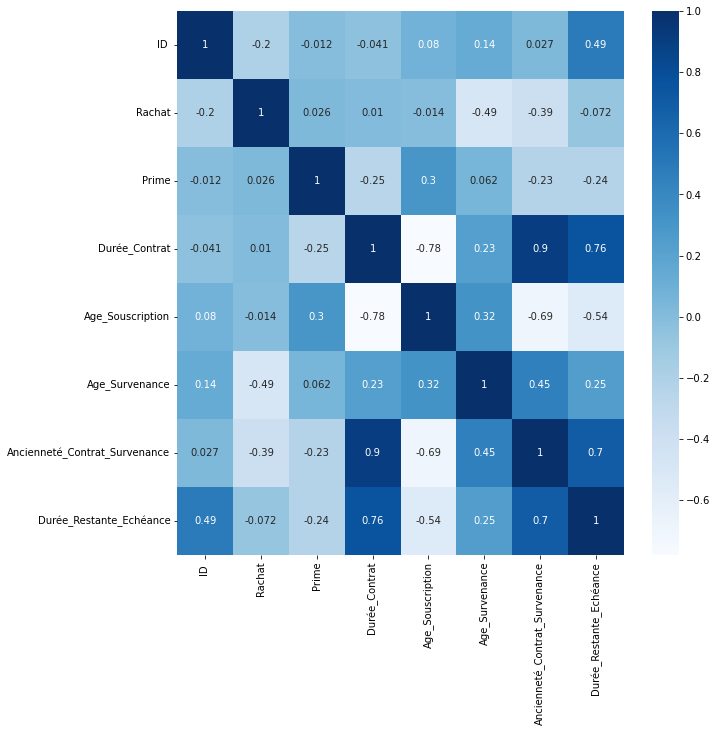

In [13]:
#Préparation des données
#Matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.savefig('matrice_correlation.png')
plt.show()

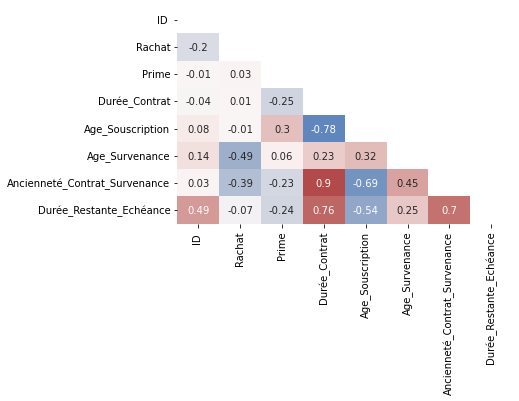

<Figure size 432x288 with 0 Axes>

In [14]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, cbar= False)
plt.show()
plt.savefig('matrice_correlation2.png')

On remarque une **forte correlation de 0.9 entre Durée_contrat et Ancienneté_Contrat_Survenance** et **une corrélation de 0.7 entre Durée_restante_Echéance et Ancienneté_Contrat_Survenance** .On supprimera donc les variables **Durée_Contrat** et **Durée_Restante_Echéance**.

In [15]:
df.drop("Durée_Contrat", axis=1, inplace=True)

In [16]:
df.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [17]:
df

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753
1,1715,0,5196.80,T,1992-09-03,2016-07-08,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274
2,4036,0,1496.88,A,1986-04-25,2016-03-02,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973
3,5212,0,145.50,A,1988-02-03,2015-11-11,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041
4,6026,0,2174.76,A,1986-09-09,2016-07-15,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,280200,0,952.56,T,2016-08-05,2053-12-19,Producteur,1986-01-27,30.0,67.939726,M,Encours,2053-12-19 00:00:00,37.397260
18893,280213,0,934.56,S,2016-08-15,2033-12-03,Producteur,1974-10-05,41.0,59.202740,F,Encours,2033-12-03 00:00:00,17.312329
18894,280221,0,7560.00,A,2016-08-13,2041-11-29,Agent,1976-03-21,40.0,65.736986,M,Encours,2041-11-29 00:00:00,25.312329
18895,280239,0,1134.00,S,2016-08-15,2051-02-05,Producteur,1986-07-30,30.0,64.564384,M,Encours,2051-02-05 00:00:00,34.498630


## 2. Analyse de la variable target

In [18]:
df['Rachat']

0        0
1        0
2        0
3        0
4        0
        ..
18892    0
18893    0
18894    0
18895    0
18896    0
Name: Rachat, Length: 18897, dtype: int64

In [19]:
df['Rachat'].value_counts(normalize=True)

0    0.953591
1    0.046409
Name: Rachat, dtype: float64

Seulement **4.64%** des contrats sont rachetés; contre **95.35%** qui sont soit encours soit echus. Donc on voit clairement que nos données sont **déséquilibrées**

## Histogrammes des variables continues 

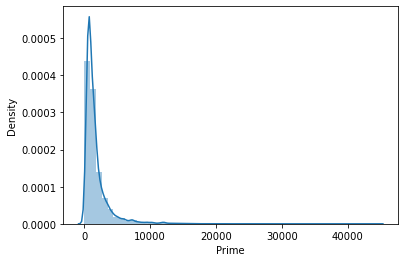

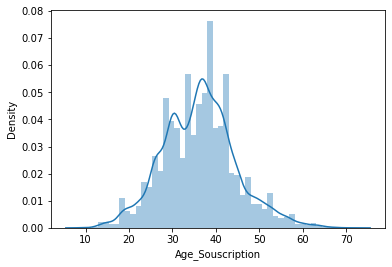

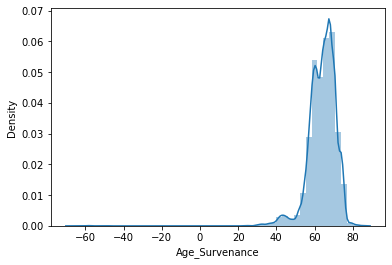

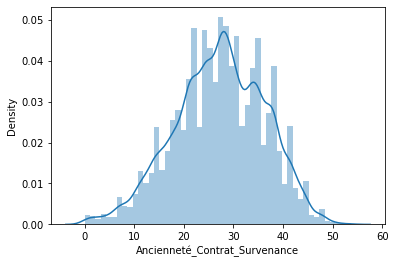

In [20]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col]) 
plt.savefig('histogramme.png')

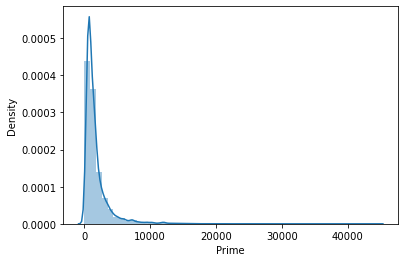

In [21]:
plt.figure()
sns.distplot(df['Prime']) 
plt.savefig('histprime.png')

### variables qualitatives 

In [22]:
df['Fréquence'].unique()

array([nan, 'T', 'A', 'S', 'M'], dtype=object)

In [23]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique() )

Fréquence [nan 'T' 'A' 'S' 'M']
Réseau_Distribution ['Producteur ' 'Agent']
Sexe ['M' 'F']
Status_Contrat ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


In [24]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') #on change la forme d'affichage

Fréquence----------------------------------------- [nan 'T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']
Status_Contrat------------------------------------ ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance----------------------------------- [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


# Pré-traitement de données 

In [25]:
df = data.copy()
df.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


In [26]:
df.columns


Index(['ID ', 'Rachat', 'Prime', 'Fréquence', 'Date_Effet', 'Date_Echéance',
       'Durée_Contrat', 'Réseau_Distribution', 'Date_de_naissance',
       'Age_Souscription', 'Age_Survenance', 'Sexe', 'Status_Contrat',
       'Date_Survenance', 'Ancienneté_Contrat_Survenance',
       'Durée_Restante_Echéance'],
      dtype='object')

In [27]:
data = df.drop(['ID ', 'Date_Effet','Date_Echéance', 'Date_de_naissance',
       'Status_Contrat','Date_Survenance'], axis=1) 
#Eliminer les variables non utiles 

In [28]:
data.head()


,Rachat,Prime,Fréquence,Durée_Contrat,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,0,1296.88,NaN,23.865753,Producteur,34.0,57.934247,M,23.865753,0.0
1,0,5196.80,T,23.860274,Producteur,34.0,58.356164,M,23.860274,0.0
2,0,1496.88,A,29.873973,Producteur,32.0,62.347945,M,29.873973,0.0
3,0,145.50,A,27.789041,Producteur,34.0,62.350685,F,27.789041,0.0
4,0,2174.76,A,29.868493,Producteur,28.0,58.413699,M,29.868493,0.0


In [29]:
data.shape

(18897, 10)

In [30]:
data = data.dropna(axis=0)
data.shape

(17855, 10)

In [31]:
data.describe()

,Rachat,Prime,Durée_Contrat,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
count,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000
mean,0.045029,1783.837462,27.919342,36.385438,64.050809,27.141172,20.382020
std,0.207374,2049.331000,8.347539,8.408454,6.843959,8.997640,9.042965
min,0.000000,7.400000,0.531507,9.000000,22.668493,0.030137,0.000000
25%,0.000000,720.230000,22.095890,31.000000,60.024658,21.284932,13.838356
50%,0.000000,1164.700000,27.901370,37.000000,64.945205,27.476712,20.991781
75%,0.000000,1999.140000,34.210959,41.000000,68.512329,33.605479,26.604110
max,1.000000,44487.300000,53.791781,72.000000,85.939726,53.791781,47.498630


In [32]:
data.drop("Durée_Contrat", axis=1, inplace=True)

In [33]:
data.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [34]:
data

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,5196.80,T,Producteur,34.0,58.356164,M,23.860274
2,0,1496.88,A,Producteur,32.0,62.347945,M,29.873973
3,0,145.50,A,Producteur,34.0,62.350685,F,27.789041
4,0,2174.76,A,Producteur,28.0,58.413699,M,29.868493
5,0,2536.38,T,Producteur,37.0,67.558904,M,29.868493
...,...,...,...,...,...,...,...,...
18892,0,952.56,T,Producteur,30.0,67.939726,M,37.397260
18893,0,934.56,S,Producteur,41.0,59.202740,F,17.312329
18894,0,7560.00,A,Agent,40.0,65.736986,M,25.312329
18895,0,1134.00,S,Producteur,30.0,64.564384,M,34.498630


In [35]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}') 

Fréquence----------------------------------------- ['T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']


In [36]:
data.dropna(axis=0 , inplace = True)

In [37]:
data.shape


(17855, 8)

## Encodage Selection des variables

In [38]:
#creation d'une fontion encodage pour l'utiliser aprés sur le testset
def encodage(data):
    code = {'M':3,
            'T':2,
            'S':1,
            'A':0,
            'Producteur ':0,
            'Agent':1,
            'M':0,
            'F':1,
           }
    
    for col in data.select_dtypes('object').columns:
        data.loc[:,col] = data[col].map(code)
        
    return data

In [39]:
data = encodage(data)

## scaling

On remarque que nos variables quantitatives sont à plus grandes échelle.Or que les algorithmes d'apprentissage automatique donneront plus d'importance aux variables à plus grande échelle.Donc cela nécessite une mise à échelle de nos données.

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = ['Prime','Age_Souscription','Age_Survenance','Ancienneté_Contrat_Survenance']
mms = MinMaxScaler()
scaled = mms.fit_transform(data[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    data[col] = scaled[col]
    
data.head()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,0.033487,2,0,0.365079,0.627133,0,0.555114
2,0,0.003105,0,0,0.396825,0.627176,0,0.516333
3,0,0.048727,0,0,0.301587,0.564952,1,0.555012
4,0,0.056857,0,0,0.444444,0.709492,0,0.555012
5,0,0.045724,2,0,0.460317,0.691262,0,0.523926


In [41]:
data.columns

Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

<AxesSubplot:>

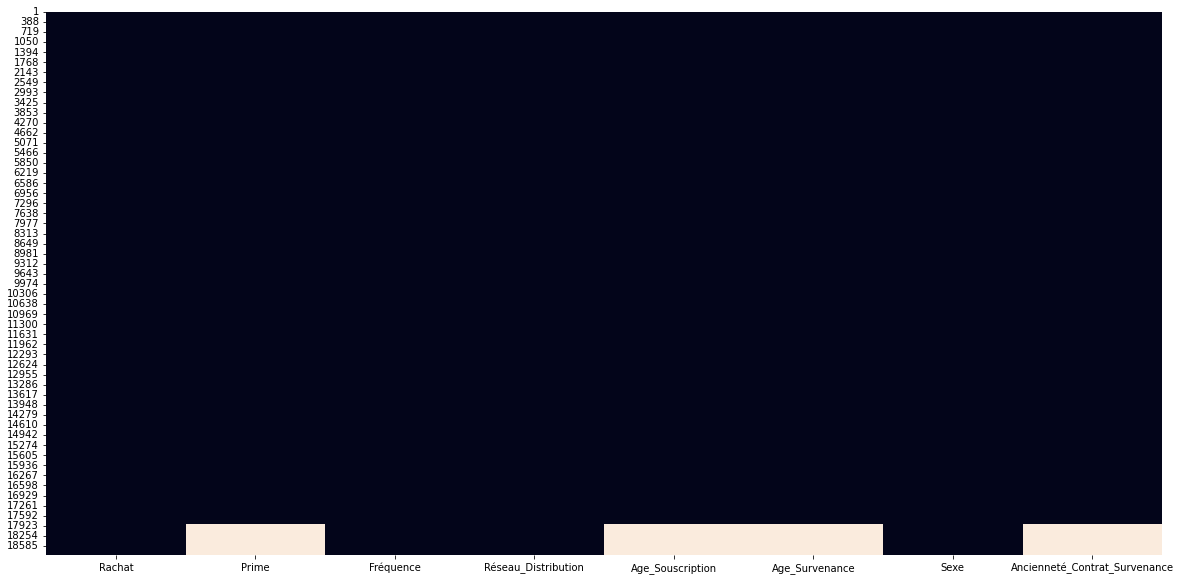

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [43]:
data.dropna(axis=0 , inplace = True)

In [44]:
data.shape

(16813, 8)

In [45]:
var_quali=['Fréquence','Réseau_Distribution','Sexe']
var_quanti=['Prime','Age_Souscription', 'Age_Survenance','Ancienneté_Contrat_Survenance']
df1=data[var_quali]
df2=data[var_quanti]

In [46]:
y=data['Rachat']

In [47]:
y

1        0
2        0
3        0
4        0
5        0
        ..
17850    0
17851    0
17852    0
17853    0
17854    0
Name: Rachat, Length: 16813, dtype: int64

In [48]:
df1


,Fréquence,Réseau_Distribution,Sexe
1,2,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,2,0,0
...,...,...,...
17850,0,0,1
17851,0,0,0
17852,0,0,1
17853,0,1,1


In [49]:
df1

,Fréquence,Réseau_Distribution,Sexe
1,2,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,2,0,0
...,...,...,...
17850,0,0,1
17851,0,0,0
17852,0,0,1
17853,0,1,1


In [50]:
df2

,Prime,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
1,0.033487,0.365079,0.627133,0.555114
2,0.003105,0.396825,0.627176,0.516333
3,0.048727,0.301587,0.564952,0.555012
4,0.056857,0.444444,0.709492,0.555012
5,0.045724,0.460317,0.691262,0.523926
...,...,...,...,...
17850,0.021249,0.333333,0.715511,0.695052
17851,0.020844,0.507937,0.577423,0.321460
17852,0.169798,0.492063,0.680696,0.470264
17853,0.025328,0.333333,0.662163,0.641135


In [51]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
chi2(df1,y)

(array([6.96078389, 8.07963391, 1.9010022 ]),
 array([0.00833155, 0.00447655, 0.16796618]))

In [52]:
#Selection des variables
selector = SelectKBest(chi2,k=2)
selector.fit(df1, y)
np.array(var_quali)[selector.get_support()]

array(['Fréquence', 'Réseau_Distribution'], dtype='<U19')

In [53]:
selector.get_support()

array([ True,  True, False])

In [54]:
df2

,Prime,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
1,0.033487,0.365079,0.627133,0.555114
2,0.003105,0.396825,0.627176,0.516333
3,0.048727,0.301587,0.564952,0.555012
4,0.056857,0.444444,0.709492,0.555012
5,0.045724,0.460317,0.691262,0.523926
...,...,...,...,...
17850,0.021249,0.333333,0.715511,0.695052
17851,0.020844,0.507937,0.577423,0.321460
17852,0.169798,0.492063,0.680696,0.470264
17853,0.025328,0.333333,0.662163,0.641135


In [55]:
f_classif(df2,y)

(array([3.23038353e-02, 4.38425477e+01, 5.29060656e+02, 1.18207983e+02]),
 array([8.57364604e-001, 3.66657794e-011, 2.70856791e-115, 1.92672541e-027]))

In [56]:
selector1 = SelectKBest(f_classif,k=3)
selector1.fit(df2, y)
np.array(var_quanti)[selector1.get_support()]

array(['Age_Souscription', 'Age_Survenance',
       'Ancienneté_Contrat_Survenance'], dtype='<U29')

In [57]:
var_select=['Fréquence', 'Réseau_Distribution','Age_Souscription', 'Age_Survenance',
       'Ancienneté_Contrat_Survenance']

X= data[var_select]
X 

,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
1,2,0,0.365079,0.627133,0.555114
2,0,0,0.396825,0.627176,0.516333
3,0,0,0.301587,0.564952,0.555012
4,0,0,0.444444,0.709492,0.555012
5,2,0,0.460317,0.691262,0.523926
...,...,...,...,...,...
17850,0,0,0.333333,0.715511,0.695052
17851,0,0,0.507937,0.577423,0.321460
17852,0,0,0.492063,0.680696,0.470264
17853,0,1,0.333333,0.662163,0.641135


# Modélisation

In [58]:
import sklearn
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [59]:
# Splitting Train and Test Data
X_train,X_test,y_train,y_test  = train_test_split(X,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)
columns = X_train.columns

In [60]:
X_train

,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
8577,1,0,0.333333,0.645146,0.620700
5994,0,0,0.206349,0.636442,0.756663
7529,1,0,0.412698,0.745475,0.646486
14587,0,0,0.428571,0.741794,0.623860
10564,0,0,0.380952,0.820256,0.767161
...,...,...,...,...,...
12323,1,0,0.619048,0.535724,0.152984
13003,0,0,0.682540,0.629774,0.190185
6322,0,0,0.333333,0.651684,0.624267
917,0,0,0.428571,0.299905,0.090557


In [61]:
X_test

,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
54,2,1,0.587302,0.646142,0.321969
1825,0,0,0.444444,0.757383,0.622433
3002,0,1,0.190476,0.804884,0.974367
1176,2,0,0.555556,0.720187,0.448199
11989,0,0,0.428571,0.643371,0.507873
...,...,...,...,...,...
178,2,0,0.222222,0.202001,0.219844
12098,0,0,0.746032,0.788430,0.293686
14331,0,0,0.079365,0.528709,0.780920
4126,0,0,0.222222,0.468087,0.525506


## REGRESSION LOGISTIQUE

In [62]:
model_lr=LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr= model_lr.predict(X_test)

In [63]:
# Evaluate
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


[[4772    1]
 [ 270    1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4773
           1       0.50      0.00      0.01       271

    accuracy                           0.95      5044
   macro avg       0.72      0.50      0.49      5044
weighted avg       0.92      0.95      0.92      5044



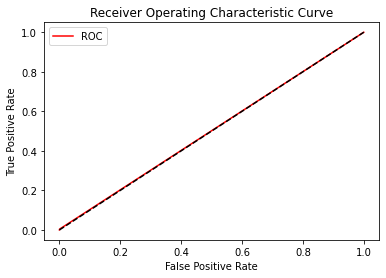

In [64]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
#pred = model_lr.predict(X_test)  
fper, tper, thresholds = roc_curve(y_test, pred_lr)
plot_roc_curve(fper, tper)

**Le modèle de régression logistique est précis à 95 %**, alors où est le problème ? Oui, il peut classer correctement presque toutes les contrats non rachetés. Mais il a également **classé 100% des contrats rachetés comme non rachetés**. En un mot, le modèle est inutilisable. Le déséquilibre des classes a tué sa performance. **SMOTE** peut nous aider.

**SMOTE**

In [65]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [66]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X_train_sm, y_train_sm =sm.fit_resample(X_train, y_train)


In [67]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model1 = LogisticRegression()

params = {
    'penalty'      : ['none', 'l1', 'l2', 'elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False]
}
search = GridSearchCV(model1, params, scoring='accuracy', n_jobs=-1, cv=3)
result = search.fit(X_train_sm, y_train_sm)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6091574063330826
Best Hyperparameters: {'C': 0.005, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [68]:
model_lr_sm=LogisticRegression(C= 0.005, fit_intercept=True, penalty='l1', solver='liblinear')
model_lr_sm.fit(X_train_sm, y_train_sm)
pred_sm= model_lr_sm.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_sm))
print(classification_report(y_test, pred_sm))


[[3633 1140]
 [ 154  117]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      4773
           1       0.09      0.43      0.15       271

    accuracy                           0.74      5044
   macro avg       0.53      0.60      0.50      5044
weighted avg       0.91      0.74      0.81      5044



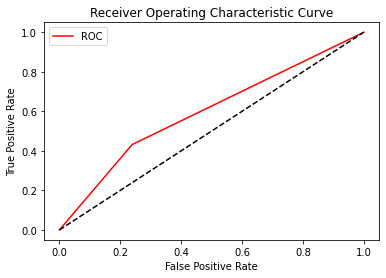

In [69]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()  
fper, tper, thresholds = roc_curve(y_test, pred_sm)
plot_roc_curve(fper, tper)

On constate qu'après le smote la précision du modèle 1 a diminué mais son **Rappel est passé de 0% à 42%**.

**SMOTE-ENN**

In [70]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [71]:
sm_enn=SMOTEENN()
X_train_enn, y_train_enn =sm_enn.fit_resample(X_train, y_train)

In [72]:
model_lr_enn=LogisticRegression(C= 0.005, fit_intercept=True, penalty='l1', solver='liblinear')
model_lr_enn.fit(X_train_enn, y_train_enn)
pred_enn= model_lr_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_enn))
print(classification_report(y_test, pred_enn))


[[3829  944]
 [ 160  111]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      4773
           1       0.11      0.41      0.17       271

    accuracy                           0.78      5044
   macro avg       0.53      0.61      0.52      5044
weighted avg       0.91      0.78      0.84      5044



### RL with statsmodels

In [73]:
import numpy as np
import statsmodels.api as stm

model = stm.Logit(y_train_enn,X_train_enn)
LR = model.fit(method='newton')


Optimization terminated successfully.
         Current function value: 0.597862
         Iterations 6


In [74]:
LR.params
LR.predict(X_test)
(LR.predict(X_test) >= 0.5).astype(int)
LR.pred_table()


array([[5992., 2331.],
       [3655., 4635.]])

In [75]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Rachat   No. Observations:                16613
Model:                          Logit   Df Residuals:                    16608
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.1375
Time:                        13:08:57   Log-Likelihood:                -9932.3
converged:                       True   LL-Null:                       -11515.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Fréquence                         0.1518      0.023      6.553      0.000       0.106       0.197
Réseau_Distribution              -0.3714      0.049     -7.636      0.000      -0.467      -0.276
Age_Souscription                 19.0031      0.424     44.810      0.000      18.172      19.834
Age_Survenance                  -25.9620      0.575    -45.160      0.000     -27.089     -24.835
Ancienneté_Contrat_Survenance    16.7799      0.389     43.087      0.000      16.017      17.543
=================================================================================================
"""

In [76]:
LR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.137     
Dependent Variable:       Rachat                AIC:                   19874.5767
Date:                     2022-10-25 13:08      BIC:                   19913.1664
No. Observations:         16613                 Log-Likelihood:        -9932.3   
Df Model:                 4                     LL-Null:               -11515.   
Df Residuals:             16608                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           6.0000                                                 
---------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Fréquence                       0.1518   0.0232   6.5534 0.0000   0.1064   0.1971
Réseau_Distribution            -0.3714   0.0486  -7.6357 0.0000  -0.4668  -0.2761
Age_Souscription               19.0031   0.4241  44.8103 0.0000  18.1719  19.8343
Age_Survenance                -25.9620   0.5749 -45.1601 0.0000 -27.0888 -24.8352
Ancienneté_Contrat_Survenance  16.7799   0.3894  43.0865 0.0000  16.0166  17.5432
=================================================================================

"""

## ARBRE DE DECISION

In [77]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[4562  211]
 [ 237   34]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4773
           1       0.14      0.13      0.13       271

    accuracy                           0.91      5044
   macro avg       0.54      0.54      0.54      5044
weighted avg       0.91      0.91      0.91      5044



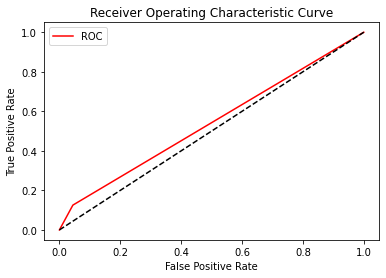

In [78]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2 = model2.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2)
plot_roc_curve(fper, tper)



on cherche les meilleurs paramétres avec grid search et on reexcute l'algorithme sur le data resampled avec SMOT

In [79]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [20,30,40,50,60,70,80,90,100,],
    'max_depth'            : [3,4,5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_model2 = search.fit(X_train_sm, y_train_sm)

# summarize result
print('Best Score: %s' % CV_model2.best_score_)
print('Best Hyperparameters: %s' % CV_model2.best_params_)

Best Score: 0.7077258709561397
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [80]:
model2_sm = DecisionTreeClassifier(max_depth= 8,min_samples_leaf= 30, min_samples_split= 80)
model2_sm.fit(X_train_sm, y_train_sm)
pred2_sm = model2_sm.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, pred2_sm))
print(classification_report(y_test, pred2_sm))

[[4510  263]
 [ 208   63]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4773
           1       0.19      0.23      0.21       271

    accuracy                           0.91      5044
   macro avg       0.57      0.59      0.58      5044
weighted avg       0.91      0.91      0.91      5044



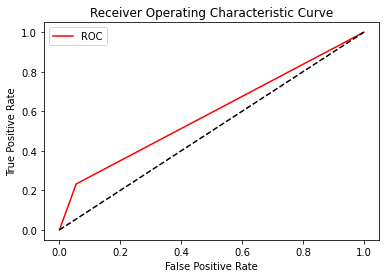

In [81]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2_sm = model2_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2_sm)
plot_roc_curve(fper, tper)



**SMOTEENN**

In [82]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [20,30,40,50,60,70,80,90,100],
    'max_depth'            : [3,4,5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_enn = search.fit(X_train_sm, y_train_sm)

# summarize result
print('Best Score: %s' % CV_enn.best_score_)
print('Best Hyperparameters: %s' % CV_enn.best_params_)

Best Score: 0.7077258709561397
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [83]:
model2_enn = DecisionTreeClassifier(max_depth=8 ,min_samples_leaf= 30, min_samples_split= 80)
model2_enn.fit(X_train_enn, y_train_enn)
pred2_enn= model2_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred2_enn))
print(classification_report(y_test, pred2_enn))


[[3760 1013]
 [ 161  110]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86      4773
           1       0.10      0.41      0.16       271

    accuracy                           0.77      5044
   macro avg       0.53      0.60      0.51      5044
weighted avg       0.91      0.77      0.83      5044



 la précision a passé à 82% et le rappel après le SMOTEENN passe de 21% à 37%

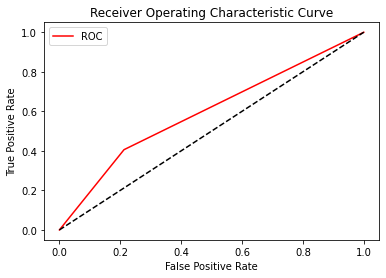

In [84]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2_enn = model2_enn.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2_enn)
plot_roc_curve(fper, tper)



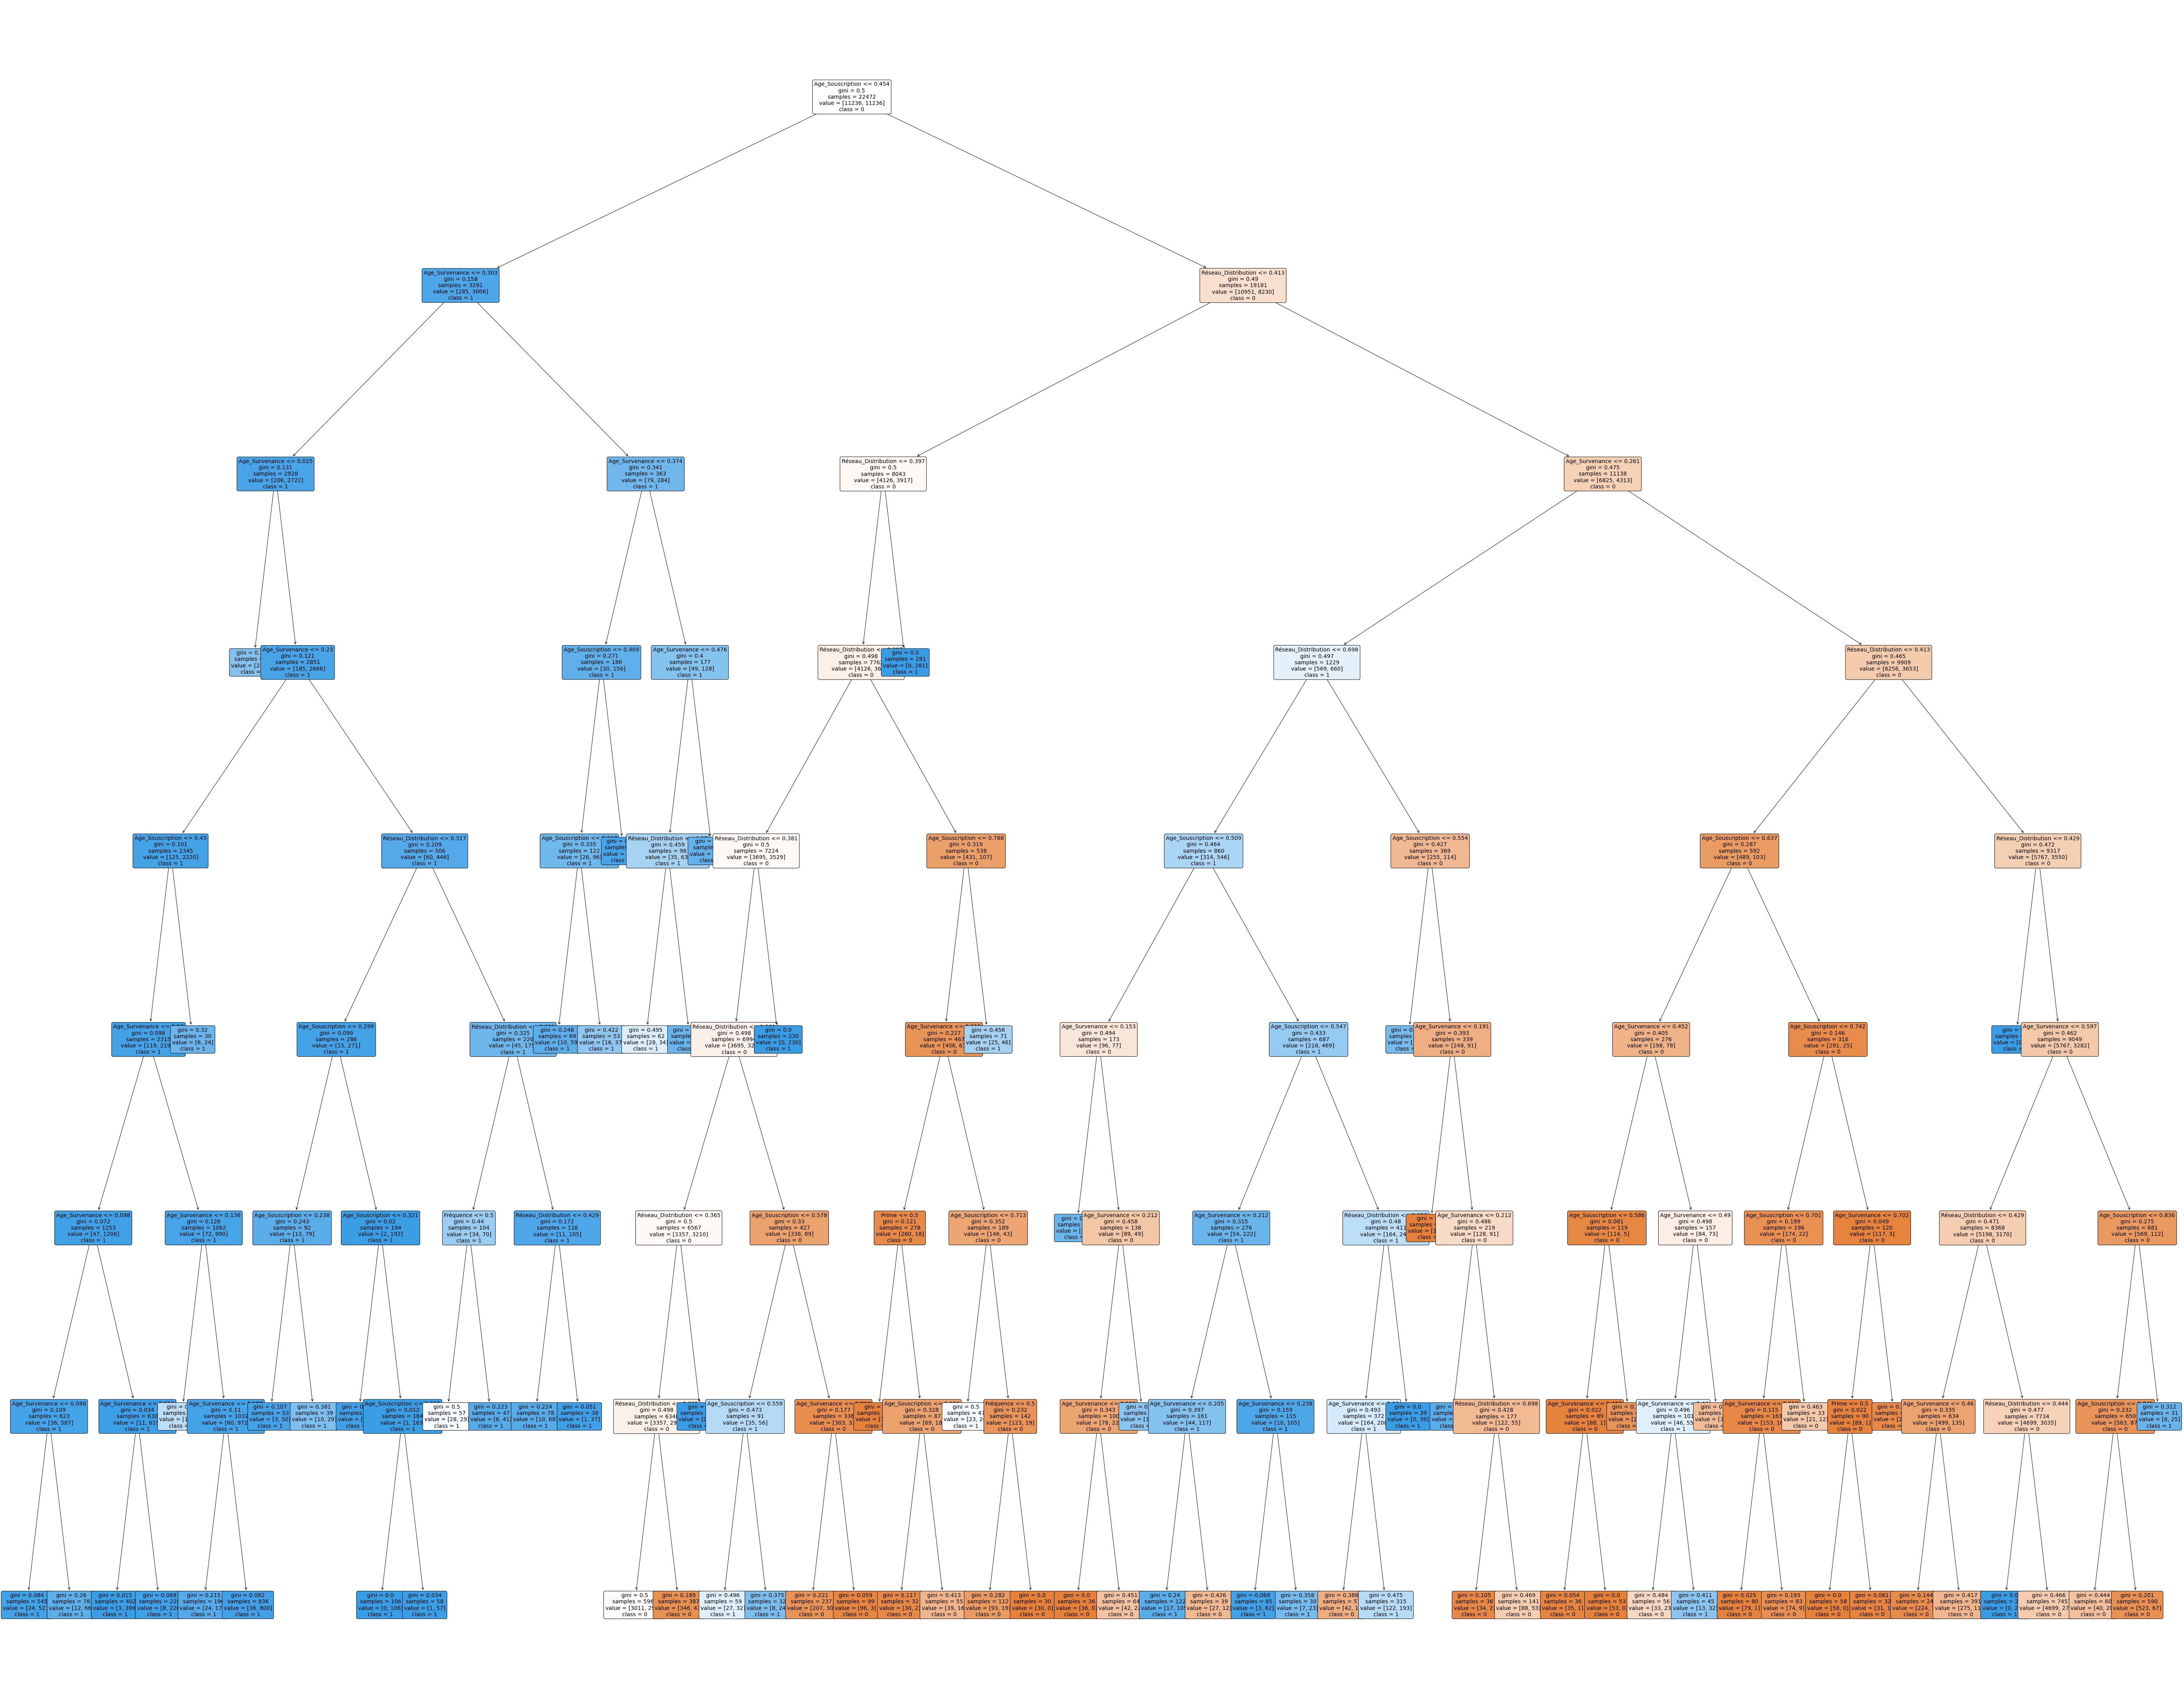

In [85]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,80))
a = plot_tree(model2_sm, 
              feature_names=data.drop('Rachat', axis=1).columns,    
              class_names=data['Rachat'].unique().astype(str), 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('desiciontree.png')

In [86]:
print(model2_enn.feature_importances_)

[0.01384728 0.01463847 0.19653182 0.57050252 0.20447991]


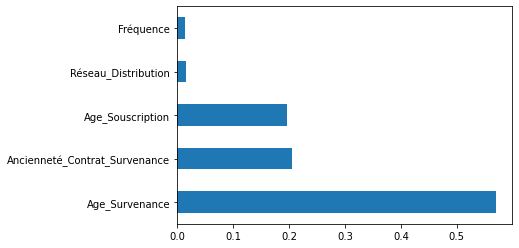

In [87]:
#plot the graph of feature importances 
feat_importances = pd.Series(model2_enn.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

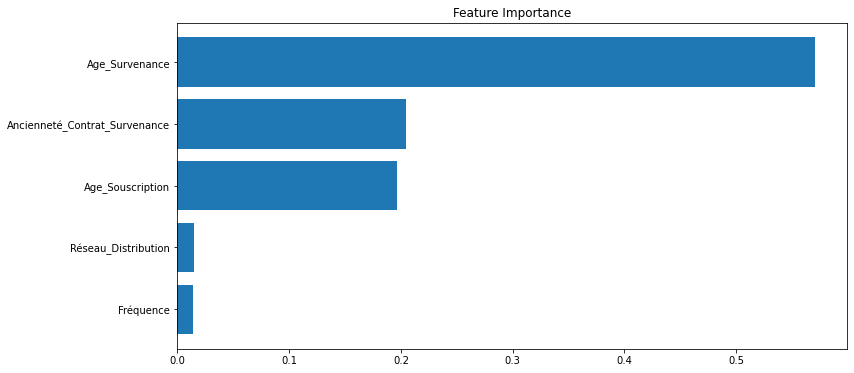

In [88]:
feature_importance = model2_enn.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


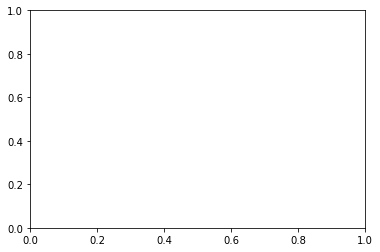

In [89]:
fig, ax = plt.subplots()


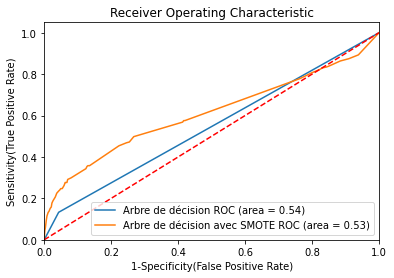

In [90]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Arbre de décision',
    'model': model2 ,
},
{
    'label': 'Arbre de décision avec SMOTE',
    'model': model2_sm,
}   
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


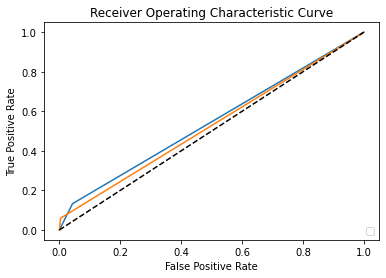

<Figure size 432x288 with 0 Axes>

In [91]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2 = model2.predict(X_test) 
pred2_sm = model2_sm.predict(X_test) 

fig, ax = plt.subplots()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
fper1, tper1, thresholds = roc_curve(y_test, pred2) 
fper2, tper2, thresholds = roc_curve(y_test, pred2_sm)
ax.plot(fper1,tper1,label='%s ROC (area = %0.2f)' % (m['label'], auc))
ax.plot(fper2,tper2,label="auc="+str(auc))
ax.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
plt.savefig('roccurve_dt.png')



### courbe ROC pour les deux modéles DT et DT+SMOTE

In [92]:
from sklearn import metrics
auc1 = metrics.roc_auc_score(y_test,pred2)
auc2 = metrics.roc_auc_score(y_test,pred2_sm)

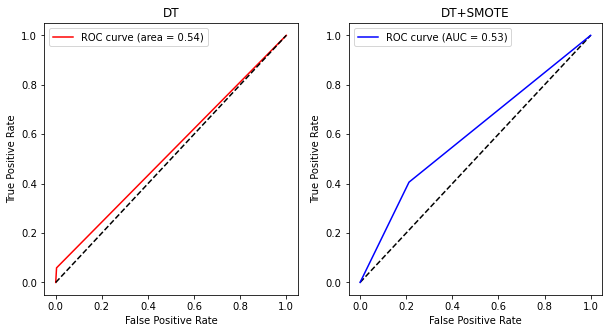

In [93]:
import matplotlib.pyplot as plt
plt.figure (figsize= (10, 5)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(1, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='red', label="ROC curve (area = %0.2f)" % auc1)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DT')
    plt.legend()
    #plt.show()
pred2_sm = model2_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2_sm)
plot_roc_curve(fper, tper)

plt.subplot(1, 2, 2)
# Modify right plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (AUC = %0.2f)" % auc2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DT+SMOTE')
    plt.legend()
    #plt.show()
pred2_sm = model2_enn.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2_sm)
plot_roc_curve(fper, tper)

plt.show()

## RONDOM FOREST

**SANS SMOTE**

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc1=RandomForestClassifier()
rfc1.fit(X_train, y_train)
pred_rfc1= rfc1.predict(X_test)


In [95]:
# Evaluate
print(confusion_matrix(y_test, pred_rfc1))
print(classification_report(y_test, pred_rfc1))

[[4738   35]
 [ 253   18]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4773
           1       0.34      0.07      0.11       271

    accuracy                           0.94      5044
   macro avg       0.64      0.53      0.54      5044
weighted avg       0.92      0.94      0.92      5044



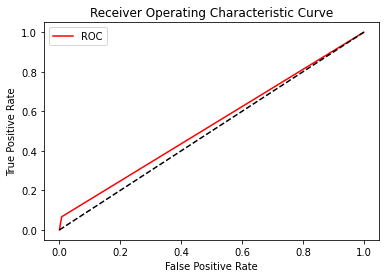

In [96]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred_rfc1 = rfc1.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred_rfc1)
plot_roc_curve(fper, tper)



**AVEC SMOTE**

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc=RandomForestClassifier(random_state=30)
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': [2,3,4,5],
    'max_depth' : [4,5,6,7,8],
   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, random_state=30)

In [98]:
# summarize result
print('Best Score: %s' % CV_rfc.best_score_)
print('Best Hyperparameters: %s' % CV_rfc.best_params_)

Best Score: 0.9558161258372959
Best Hyperparameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 100}


In [99]:
model3_sm = RandomForestClassifier( max_depth=5, max_features=2,
                       n_estimators=100, random_state=30)
model3_sm.fit(X_train_sm, y_train_sm)
pred3_sm = model3_sm.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred3_sm))
print(classification_report(y_test, pred3_sm))

[[4188  585]
 [ 174   97]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4773
           1       0.14      0.36      0.20       271

    accuracy                           0.85      5044
   macro avg       0.55      0.62      0.56      5044
weighted avg       0.92      0.85      0.88      5044



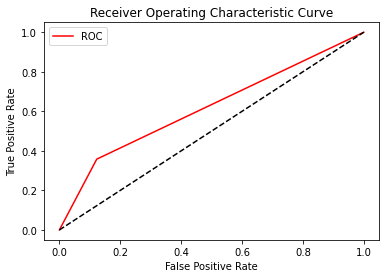

In [100]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred3_sm = model3_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred3_sm)
plot_roc_curve(fper, tper)



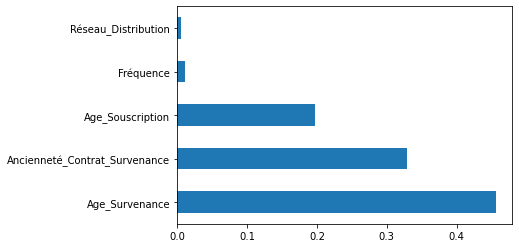

In [101]:
feat_importances_model3sm= pd.Series(model3_sm.feature_importances_, index=X_train.columns)
feat_importances_model3sm.nlargest(10).plot(kind='barh')
plt.show()

In [102]:
feat_importances_model3sm.nlargest(10)

Age_Survenance                   0.456719
Ancienneté_Contrat_Survenance    0.328521
Age_Souscription                 0.197907
Fréquence                        0.011177
Réseau_Distribution              0.005675
dtype: float64

**avec smoteenn**

In [103]:
model3_enn = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=2,
                       n_estimators=100, random_state=30)
model3_enn.fit(X_train_enn, y_train_enn)
pred3_enn= model3_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred3_sm))
print(classification_report(y_test, pred3_enn))


[[4188  585]
 [ 174   97]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      4773
           1       0.12      0.41      0.18       271

    accuracy                           0.80      5044
   macro avg       0.54      0.62      0.53      5044
weighted avg       0.92      0.80      0.85      5044



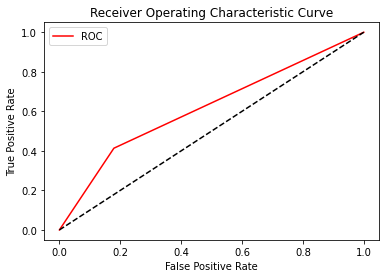

In [104]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred3_enn = model3_enn.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred3_enn)
plot_roc_curve(fper, tper)

# XGBOOST

In [105]:
import xgboost as xgb
model4 = xgb.XGBClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)


# Evaluate
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))


[[4747   26]
 [ 250   21]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4773
           1       0.45      0.08      0.13       271

    accuracy                           0.95      5044
   macro avg       0.70      0.54      0.55      5044
weighted avg       0.92      0.95      0.93      5044



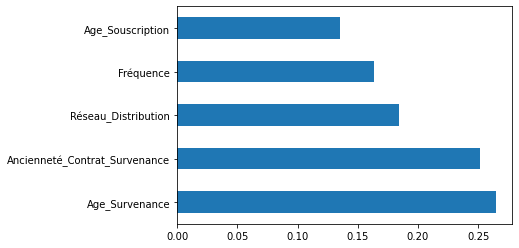

In [106]:
feat_importances_model4= pd.Series(model4.feature_importances_, index=X_train.columns)
feat_importances_model4.nlargest(10).plot(kind='barh')
plt.show()

In [107]:
feat_importances_model4.nlargest(10)

Age_Survenance                   0.265044
Ancienneté_Contrat_Survenance    0.251837
Réseau_Distribution              0.184391
Fréquence                        0.163502
Age_Souscription                 0.135227
dtype: float32

In [108]:
model4_sm= xgb.XGBClassifier()
model4_sm.fit(X_train_sm, y_train_sm)
pred4_sm = model4_sm.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, pred4_sm))
print(classification_report(y_test, pred4_sm))


[[4576  197]
 [ 217   54]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4773
           1       0.22      0.20      0.21       271

    accuracy                           0.92      5044
   macro avg       0.58      0.58      0.58      5044
weighted avg       0.91      0.92      0.92      5044



In [109]:
model4_enn = xgb.XGBClassifier()
model4_enn.fit(X_train_enn, y_train_enn)
pred4_enn= model4_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred4_enn))
print(classification_report(y_test, pred4_enn))


[[4347  426]
 [ 183   88]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      4773
           1       0.17      0.32      0.22       271

    accuracy                           0.88      5044
   macro avg       0.57      0.62      0.58      5044
weighted avg       0.92      0.88      0.90      5044



In [110]:
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees
              'missing':[-999],
              'seed': [1337]}
clf1 = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
mod=clf1.fit(X_train_enn, y_train_enn)
# summarize
print('Mean Accuracy: %.3f' % mod.best_score_)
print('Config: %s' % mod.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[13:28:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Mean Accuracy: 0.768
Config: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


In [111]:
xgb_model = xgb.XGBClassifier( learning_rate= 0.05, max_depth= 6, n_estimators= 5, nthread= 4)
xgb_model.fit(X_train_enn, y_train_enn)
pred_xgb= xgb_model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


[[3676 1097]
 [ 149  122]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      4773
           1       0.10      0.45      0.16       271

    accuracy                           0.75      5044
   macro avg       0.53      0.61      0.51      5044
weighted avg       0.91      0.75      0.82      5044

